In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder



##**Load the dataset**

In [ ]:
# load dataset
df = pd.read_csv("/content/ionosphere_csv.csv")

In [ ]:
df

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


##**Pre-processing**

In [ ]:
# Split data input (X) and output (Y) variables
X = df.drop('class',axis=1).astype(float)
Y = df['class'] #Target feature

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)


In [ ]:
X

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34
0,1.0,0.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1.0,0.0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1.0,0.0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1.0,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1.0,0.0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,0.0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1.0,0.0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1.0,0.0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1.0,0.0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [ ]:
Y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

##**Constant Learning Rate**

In [ ]:
# create model
model = Sequential()
model.add(Dense(34, input_dim=34, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
epochs = 50  #mention the number of epochs
learning_rate = 0.1 # declare constant learning rate

# Declaring the optimizer that we are going to use specifying the learning rate

sgd = SGD(lr=learning_rate, momentum=0, decay=0, nesterov=False) # Here decay and momentum are zero because we want the learning rate to remain constant.
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
history=model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)


Epoch 1/50
9/9 - 1s - loss: 0.6602 - accuracy: 0.6553 - val_loss: 0.5278 - val_accuracy: 0.8966
Epoch 2/50
9/9 - 0s - loss: 0.5756 - accuracy: 0.7447 - val_loss: 0.4945 - val_accuracy: 0.8707
Epoch 3/50
9/9 - 0s - loss: 0.5256 - accuracy: 0.7787 - val_loss: 0.4984 - val_accuracy: 0.8448
Epoch 4/50
9/9 - 0s - loss: 0.4847 - accuracy: 0.8213 - val_loss: 0.4582 - val_accuracy: 0.8966
Epoch 5/50
9/9 - 0s - loss: 0.4507 - accuracy: 0.8553 - val_loss: 0.4193 - val_accuracy: 0.9483
Epoch 6/50
9/9 - 0s - loss: 0.4194 - accuracy: 0.8809 - val_loss: 0.3643 - val_accuracy: 0.9655
Epoch 7/50
9/9 - 0s - loss: 0.3948 - accuracy: 0.8766 - val_loss: 0.3695 - val_accuracy: 0.9655
Epoch 8/50
9/9 - 0s - loss: 0.3694 - accuracy: 0.8809 - val_loss: 0.3198 - val_accuracy: 0.9828
Epoch 9/50
9/9 - 0s - loss: 0.3451 - accuracy: 0.8979 - val_loss: 0.2816 - val_accuracy: 0.9741
Epoch 10/50
9/9 - 0s - loss: 0.3279 - accuracy: 0.9021 - val_loss: 0.2949 - val_accuracy: 0.9828
Epoch 11/50
9/9 - 0s - loss: 0.3100 - a

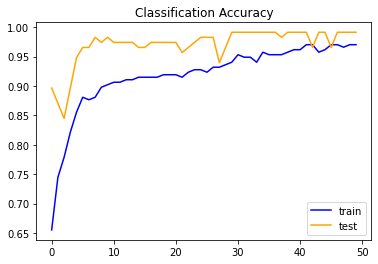

In [ ]:
import matplotlib.pyplot as plt
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.legend()

**Here we can observe that it takes around 50 epochs to reach a training accuracy of 97%. Thus it takes quite a long time to converge and the curve is somewhat bumpy due to toggling about minima due to quite high learning rate in the latter epochs. Let's apply Learning Rate Decay now.**

##**Time-based Decay**

In [ ]:
# create model
model = Sequential()
model.add(Dense(34, input_dim=34, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile model
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
history=model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)


Epoch 1/50
9/9 - 1s - loss: 0.6815 - accuracy: 0.5915 - val_loss: 0.5322 - val_accuracy: 0.8103
Epoch 2/50
9/9 - 0s - loss: 0.4421 - accuracy: 0.8383 - val_loss: 0.3690 - val_accuracy: 0.9310
Epoch 3/50
9/9 - 0s - loss: 0.3402 - accuracy: 0.8809 - val_loss: 0.2653 - val_accuracy: 0.9569
Epoch 4/50
9/9 - 0s - loss: 0.2652 - accuracy: 0.9149 - val_loss: 0.3051 - val_accuracy: 0.9138
Epoch 5/50
9/9 - 0s - loss: 0.2314 - accuracy: 0.9234 - val_loss: 0.1561 - val_accuracy: 0.9828
Epoch 6/50
9/9 - 0s - loss: 0.2106 - accuracy: 0.9277 - val_loss: 0.1726 - val_accuracy: 0.9655
Epoch 7/50
9/9 - 0s - loss: 0.1912 - accuracy: 0.9319 - val_loss: 0.1435 - val_accuracy: 0.9741
Epoch 8/50
9/9 - 0s - loss: 0.1643 - accuracy: 0.9404 - val_loss: 0.1412 - val_accuracy: 0.9741
Epoch 9/50
9/9 - 0s - loss: 0.1600 - accuracy: 0.9489 - val_loss: 0.2243 - val_accuracy: 0.9224
Epoch 10/50
9/9 - 0s - loss: 0.1476 - accuracy: 0.9489 - val_loss: 0.1135 - val_accuracy: 0.9828
Epoch 11/50
9/9 - 0s - loss: 0.1431 - a

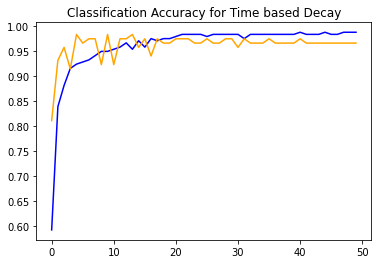

In [ ]:
import matplotlib.pyplot as plt
plt.title('Classification Accuracy for Time based Decay')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

**Here we can make two important observations :
1) The curve is smooth 
2) High accuracy is already achieved around 20th epoch which means you need not even run for 50 epochs. This proves faster convergence and saves computational time and power.**

##**Step Decay**

In [ ]:
from keras.callbacks import LearningRateScheduler
 
# learning rate schedule

def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((epoch)/epochs_drop)) 
	return lrate

In [ ]:
import math
# create model
model = Sequential()
model.add(Dense(34, input_dim=34, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
sgd = SGD(lr=0.0, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# learning schedule callback
lrate = LearningRateScheduler(step_decay,verbose=1)
callbacks_list = [lrate]

# Fit the model
history=model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=28, callbacks=callbacks_list, verbose=2)

Epoch 1/50

Epoch 00001: LearningRateScheduler reducing learning rate to 0.1.
9/9 - 1s - loss: 0.5784 - accuracy: 0.7021 - val_loss: 0.3783 - val_accuracy: 0.9397
Epoch 2/50

Epoch 00002: LearningRateScheduler reducing learning rate to 0.1.
9/9 - 0s - loss: 0.4024 - accuracy: 0.8596 - val_loss: 0.3022 - val_accuracy: 0.9397
Epoch 3/50

Epoch 00003: LearningRateScheduler reducing learning rate to 0.1.
9/9 - 0s - loss: 0.2936 - accuracy: 0.8979 - val_loss: 0.2091 - val_accuracy: 0.9655
Epoch 4/50

Epoch 00004: LearningRateScheduler reducing learning rate to 0.1.
9/9 - 0s - loss: 0.2284 - accuracy: 0.9234 - val_loss: 0.1113 - val_accuracy: 0.9741
Epoch 5/50

Epoch 00005: LearningRateScheduler reducing learning rate to 0.1.
9/9 - 0s - loss: 0.1825 - accuracy: 0.9362 - val_loss: 0.2066 - val_accuracy: 0.9483
Epoch 6/50

Epoch 00006: LearningRateScheduler reducing learning rate to 0.1.
9/9 - 0s - loss: 0.1865 - accuracy: 0.9277 - val_loss: 0.1976 - val_accuracy: 0.9741
Epoch 7/50

Epoch 0000

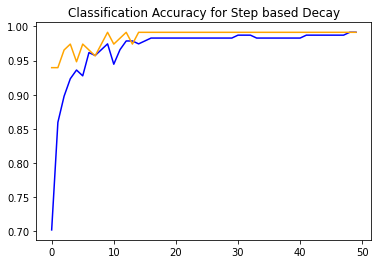

In [ ]:
import matplotlib.pyplot as plt
plt.title('Classification Accuracy for Step based Decay')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

**This is even more smooth than the previous one and here too you are achieving the accuracy at somewhat near 20th epoch.**

##**Exponential Decay**

In [ ]:
def lr_exp_decay(epoch):
    initial_learning_rate = 0.01
    k = 0.01
    lrate=initial_learning_rate * math.exp(-k*epoch)
    return lrate

In [ ]:

# create model
model = Sequential()
model.add(Dense(34, input_dim=34, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
sgd = SGD(lr=0.0, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# learning schedule callback
lrate = LearningRateScheduler(lr_exp_decay,verbose=1)
callbacks_list = [lrate]

# Fit the model
history=model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=28, callbacks=callbacks_list, verbose=2)

Epoch 1/50

Epoch 00001: LearningRateScheduler reducing learning rate to 0.01.
9/9 - 1s - loss: 0.6867 - accuracy: 0.6553 - val_loss: 0.5617 - val_accuracy: 0.7931
Epoch 2/50

Epoch 00002: LearningRateScheduler reducing learning rate to 0.009900498337491681.
9/9 - 0s - loss: 0.6307 - accuracy: 0.7106 - val_loss: 0.5323 - val_accuracy: 0.8103
Epoch 3/50

Epoch 00003: LearningRateScheduler reducing learning rate to 0.009801986733067553.
9/9 - 0s - loss: 0.5639 - accuracy: 0.7362 - val_loss: 0.5073 - val_accuracy: 0.7845
Epoch 4/50

Epoch 00004: LearningRateScheduler reducing learning rate to 0.009704455335485081.
9/9 - 0s - loss: 0.5111 - accuracy: 0.8043 - val_loss: 0.4838 - val_accuracy: 0.7931
Epoch 5/50

Epoch 00005: LearningRateScheduler reducing learning rate to 0.009607894391523233.
9/9 - 0s - loss: 0.4695 - accuracy: 0.8383 - val_loss: 0.4558 - val_accuracy: 0.8362
Epoch 6/50

Epoch 00006: LearningRateScheduler reducing learning rate to 0.00951229424500714.
9/9 - 0s - loss: 0.433

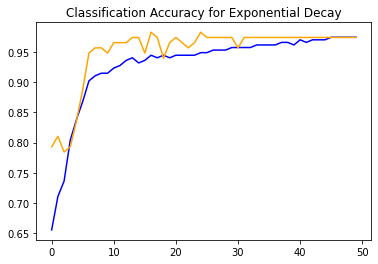

In [ ]:
import matplotlib.pyplot as plt
plt.title('Classification Accuracy for Exponential Decay')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

**You can yourself compare the performances in each case and we can conclude that using LR decay we can achieve faster convergence which speeds up our training.**